**Modelo de Vida Útil Esperada (esperanza de vida) simulando tabla de mortalidad.**

Objetivo: Desarrollar un modelo actuarial que calcule la esperanza de vida completa de individuos, y que estime reservas matemáticas para seguros de vida o rentas vitalicias, utilizando tablas de mortalidad simuladas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Tabla de mortalidad simulada aplicando ley de mortalidad exponencial.

In [ ]:
l0 = 100000
edades = np.arange(0, 101)
l_x = l0 * np.exp(-0.0004 * edades**1.3)
l_x = l_x.astype(int)

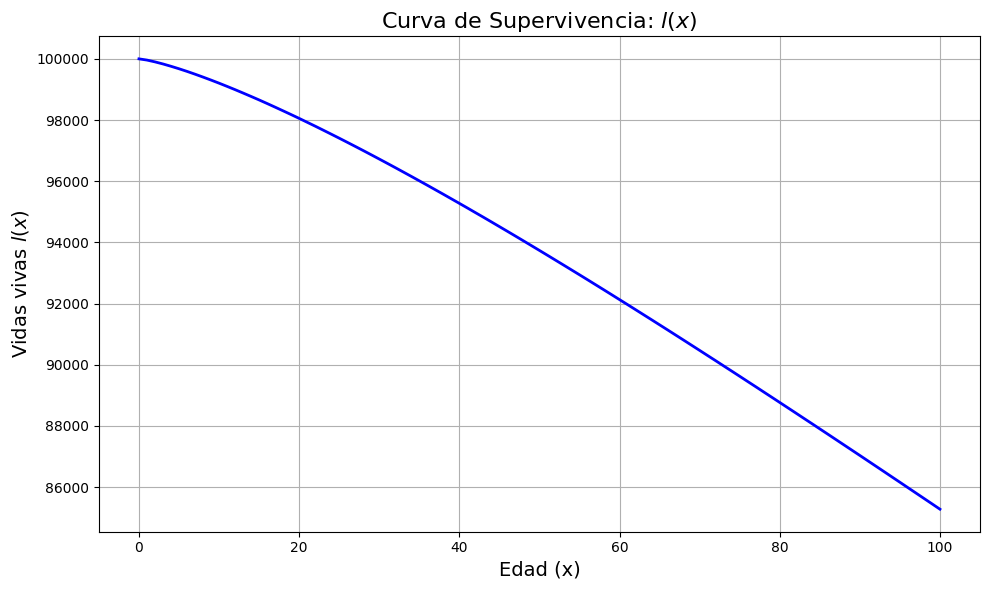

In [ ]:
# Graficar l(x)
plt.figure(figsize=(10, 6))
plt.plot(edades, l_x, color='blue', linewidth=2)
plt.title("Curva de Supervivencia: $l(x)$", fontsize=16)
plt.xlabel("Edad (x)", fontsize=14)
plt.ylabel("Vidas vivas $l(x)$", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Funciones biométricas

d_x = np.append(l_x[:-1] - l_x[1:], 0)
q_x = np.where(l_x[:-1] > 0, (l_x[:-1] - l_x[1:]) / l_x[:-1], 0)
q_x = np.append(q_x, 1)
p_x = 1 - q_x
L_x = (l_x + np.append(l_x[1:], 0)) / 2
T_x = np.flip(np.cumsum(np.flip(L_x)))
e_x = np.where(l_x > 0, T_x / l_x, 0)

In [ ]:
#Reservas actuariales

i = 0.04
v = 1 / (1 + i)
A_x = []
a_x = []

for x in range(0, 101):
    px = 1.0
    Ax = 0.0
    ax = 0.0
    for k in range(0, 100 - x):
        Ax += (v ** (k + 1)) * q_x[x + k] * px
        ax += (v ** k) * px
        px *= p_x[x + k]
    A_x.append(round(Ax, 6))
    a_x.append(round(ax, 6))

In [ ]:
# Crear DataFrame y exportar
df = pd.DataFrame({
    'Edad': edades,
    'l(x)': l_x,
    'd(x)': d_x,
    'q(x)': q_x,
    'p(x)': p_x,
    'L(x)': L_x,
    'T(x)': T_x,
    'e(x)': e_x,
    'A(x)': A_x,
    'a(x)': a_x
})

df.to_excel('Modelo_Esperanza_y_Reservas.xlsx', index=False)
df.head()

,Edad,l(x),d(x),q(x),p(x),L(x),T(x),e(x),A(x),a(x)
0,0,100000,40,0.000400,0.999600,99980.0,9384104.0,93.841040,0.028693,24.814969
1,1,99960,59,0.000590,0.999410,99930.5,9284124.0,92.878391,0.029453,24.777478
2,2,99901,68,0.000681,0.999319,99867.0,9184193.5,91.932949,0.030058,24.743182
3,3,99833,76,0.000761,0.999239,99795.0,9084326.5,90.995227,0.030601,24.709728
4,4,99757,81,0.000812,0.999188,99716.5,8984531.5,90.064171,0.031087,24.676903


**Aplicación de SQL en Análisis Actuarial (usando Python)**

Objetivo: Simular una base de datos de asegurados con edad, sexo, tipo de cobertura y otros campos, y aplicar consultas SQL para extraer información útil para el modelo de reservas y análisis de mortalidad.

In [ ]:
import sqlite3

# Simular base de asegurados
np.random.seed(42)
n = 1000
df_asegurados = pd.DataFrame({
    'id_asegurado': np.arange(1, n + 1),
    'edad': np.random.randint(18, 100, size=n),
    'sexo': np.random.choice(['M', 'F'], size=n),
    'tipo_cobertura': np.random.choice(['vida_entera', 'renta_vitalicia'], size=n),
    'suma_asegurada': np.random.randint(100000, 1000000, size=n)
})

# Crear base SQLite en memoria
conn = sqlite3.connect(":memory:")
df_asegurados.to_sql("asegurados", conn, index=False, if_exists="replace")

# Ejemplo de consulta SQL: promedio de edad por tipo de cobertura
query = """
SELECT tipo_cobertura, AVG(edad) as edad_promedio, COUNT(*) as cantidad
FROM asegurados
GROUP BY tipo_cobertura
"""

resultado = pd.read_sql_query(query, conn)
print(resultado)


    tipo_cobertura  edad_promedio  cantidad
0  renta_vitalicia      55.338552       511
1      vida_entera      58.261759       489


**Nueva Query de Detección de Posible Fraude en la Aseguradora**

Objetivo: Detectar asegurados mayores de 80 años con sumas aseguradas elevadas (por ejemplo, más de $800.000) y tipo de cobertura renta vitalicia. Este tipo de combinación podría ser inusual o riesgosa, especialmente si hay muchas pólizas similares emitidas juntas (un patrón que se investiga en fraude).

In [ ]:
# Alerta por posibles pólizas sospechosas (fraude)
alerta_fraude = """
SELECT id_asegurado, edad, sexo, tipo_cobertura, suma_asegurada
FROM asegurados
WHERE edad > 80
  AND tipo_cobertura = 'renta_vitalicia'
  AND suma_asegurada > 800000
"""

resultado_alerta = pd.read_sql_query(alerta_fraude, conn)

# Simulación de envío de alerta
if not resultado_alerta.empty:
    print("🚨 ALERTA: Se detectaron posibles pólizas sospechosas")
    print(resultado_alerta)
else:
    print("✅ Sin alertas de fraude registradas")

🚨 ALERTA: Se detectaron posibles pólizas sospechosas
    id_asegurado  edad sexo   tipo_cobertura  suma_asegurada
0             35    81    M  renta_vitalicia          873887
1             50    88    M  renta_vitalicia          972637
2             55    95    M  renta_vitalicia          903585
3            104    90    F  renta_vitalicia          966183
4            142    83    F  renta_vitalicia          968374
5            289    81    F  renta_vitalicia          970477
6            403    93    M  renta_vitalicia          883441
7            446    82    M  renta_vitalicia          803305
8            458    98    M  renta_vitalicia          964690
9            474    81    F  renta_vitalicia          897232
10           546    87    F  renta_vitalicia          924143
11           555    84    M  renta_vitalicia          875158
12           565    94    F  renta_vitalicia          892338
13           620    94    M  renta_vitalicia          887019
14           636    82    M  ren